# Finding the Largest Connected Component

In [1]:
from scipy.stats import bernoulli
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A1 = np.loadtxt('adj_allVillageRelationships_vilno_1.csv', delimiter = ',')
A2 = np.loadtxt('adj_allVillageRelationships_vilno_2.csv', delimiter = ',')
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In most networks, most nodes are connected to each other
as part of a single connected component.
That is for each pair of nodes in this component,
there exists a set of edges that create a path between them.
Let's now find out how large the largest connected component
is in our two graphs.
We can extract all components for graph using the following function
in the NetworkX module.
This function is called `connected components`-- nx.connected connected component subgraphs,
and as input we can provide G1.

In [3]:
nx.connected_components(G1)

<generator object connected_components at 0x0000020EFDCE46D0>

In this case, Python tells us that this is what's called a generator function.
Generator functions do not return a single object
but instead, they can be used to generate a sequence of objects
using the next method.

In [4]:
gen=nx.connected_components(G1)

In [5]:
g=gen.__next__()

In [6]:
type(g)

set

In [7]:
type(G1.subgraph(g))

networkx.classes.graph.Graph

In [8]:
G1.subgraph(g).number_of_nodes()

825

In [9]:
len(G1.subgraph(gen.__next__()))

3

In [10]:
len(G1.subgraph(gen.__next__()))

3

In [11]:
len(G1.subgraph(gen.__next__()))

4

In [12]:
len(G1.subgraph(gen.__next__()))

2

Python is going over the graph one component at a time. value returned is the number of components. One thing to realize about this is that the ordering of these components is arbitrary.

A good way to proceed is to use the max function that we can
use to get the maximum of a sequence.
The max function can take in a generator as its input.

But given to graph components, A and B, how can
the max function possibly know which is the maximum?
And what does maximum even mean in this context?
The answer is that we need to tell the max function what number to associate
with each object in the sequence, in this case, a graph.
The size of a component is defined as the number of nodes it contains,
which as we saw above, we can obtain by applying the len function to a given
component.

In [15]:
G1_LCC = max((G1.subgraph(c) for c in nx.connected_components(G1)), key=len)
len(G1_LCC)

825

In [14]:
G2_LCC = max((G2.subgraph(c) for c in nx.connected_components(G2)), key=len)
len(G2_LCC)

810

Let's compute the proportion of nodes that
lie in the largest connected components for these two graphs.
This is the number of nodes in the largest connected component.
We can divide that by the number of nodes in the graph itself.
And in this case, we see that 97.9% of all of the nodes of graph G1
are contained in the largest connected component.

In [16]:
G1_LCC.number_of_nodes() /G1.number_of_nodes()

0.9786476868327402

In [17]:
G2_LCC.number_of_nodes() /G2.number_of_nodes()

0.9236031927023945

Let's now try visualizing these components.
This might take a couple of minutes on your computer
so be patient.

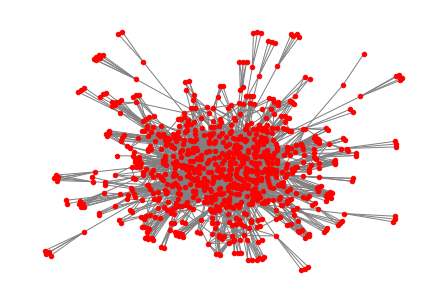

In [18]:
plt.figure()
nx.draw(G1_LCC,node_color="red",edge_color="gray", node_size=20)
plt.savefig("village1.pdf")

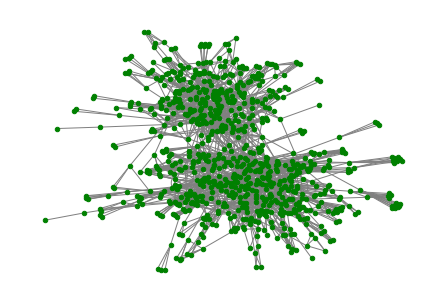

In [21]:
plt.figure()
nx.draw(G2_LCC,node_color="green",edge_color="gray", node_size=20)
plt.savefig("village2.pdf")

The visualization algorithm that we have used
is `stochastic`, meaning that if you run it several times,
you will always get a somewhat different graph layout.
However, in most visualizations, you should
find that the largest connected component of G2
appears to consist of two separate groups.
These groups are called `network communities`.
And the idea is that a community is a group
of nodes that are densely connected to other nodes in the group,
but only sparsely connected nodes outside of that group.
Finding network communities is a very interesting and timely problem.
It's also one of those problems that is fairly easy to state in words,
but a more mathematically rigorous formulation of the problem
reveals that a problem is not so easy after all.